In [167]:
from textwrap import dedent

import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from altair import datum
import numpy as np
from lmfit.models import PowerLawModel

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [173]:
data = pd.read_excel(
    "Data/Compare KERs and angles.xlsx",
    sheet_name=None)

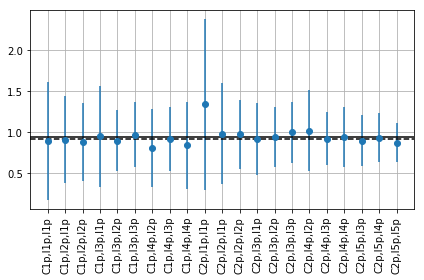

Simple average:  0.94
Avg with wights: 0.92


In [171]:
piv = data["Summ KERs"].pivot_table(values=["Value (eV)", "Std (eV)"], index="Target", columns="Corr exp")
v = piv["Value (eV)", 2017] / piv["Value (eV)", 2015]
ratio = pd.DataFrame({
    "Value (eV)": v,
    "Std (eV)": v * (piv["Std (eV)", 2017] / piv["Value (eV)", 2017]
                     + piv["Std (eV)", 2015] / piv["Value (eV)", 2015])
})
avg = np.average(ratio["Value (eV)"])
avgww = np.average(ratio["Value (eV)"], weights=1 / ratio["Std (eV)"] ** 2)

plt.figure()
plt.errorbar(ratio.index, ratio["Value (eV)"], ratio["Std (eV)"], fmt="o")
plt.axhline(avg, color="k")
plt.axhline(avgww, linestyle="--", color="k")
plt.xticks(rotation="vertical")
plt.grid(True)
plt.tight_layout()
plt.show()

print(dedent("""\
    Simple average:  {:4.2f}
    Avg with wights: {:4.2f}\
""".format(avg, avgww)))

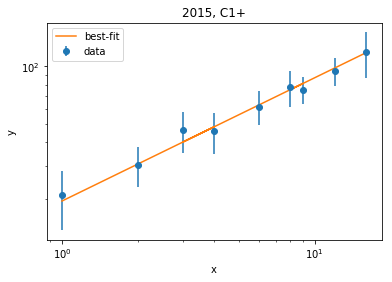

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 9
    # variables        = 2
    chi-square         = 16754.0118
    reduced chi-square = 2393.43026
    Akaike info crit   = 71.7625160
    Bayesian info crit = 72.1569652
[[Variables]]
    exponent:   0.64875282 +/- 0.03011417 (4.64%) (init = 1)
    amplitude:  19.5685552 +/- 1.53660155 (7.85%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.990



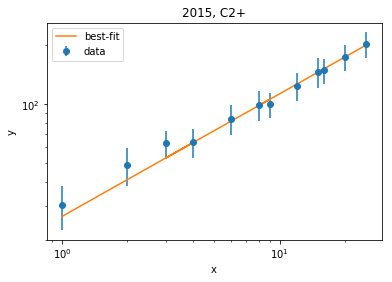

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 12
    # variables        = 2
    chi-square         = 36507.3536
    reduced chi-square = 3650.73536
    Akaike info crit   = 100.244348
    Bayesian info crit = 101.214161
[[Variables]]
    exponent:   0.62957867 +/- 0.01627781 (2.59%) (init = 1)
    amplitude:  26.5145663 +/- 1.26311668 (4.76%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.992



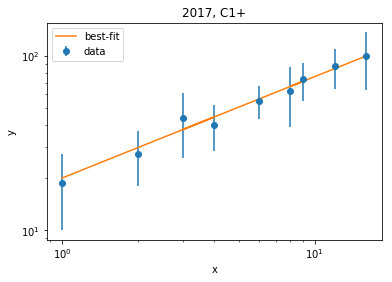

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 32
    # data points      = 9
    # variables        = 2
    chi-square         = 28187.1544
    reduced chi-square = 4026.73635
    Akaike info crit   = 76.4445735
    Bayesian info crit = 76.8390227
[[Variables]]
    exponent:   0.58130870 +/- 0.03420978 (5.88%) (init = 1)
    amplitude:  19.8892344 +/- 1.73687925 (8.73%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.988



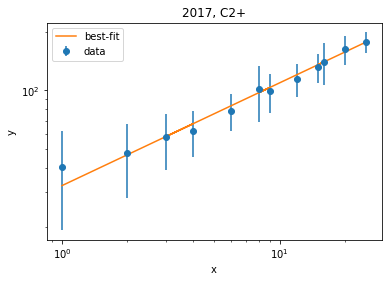

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 12
    # variables        = 2
    chi-square         = 114264.474
    reduced chi-square = 11426.4474
    Akaike info crit   = 113.936372
    Bayesian info crit = 114.906185
[[Variables]]
    exponent:   0.52689979 +/- 0.02167013 (4.11%) (init = 1)
    amplitude:  32.4574358 +/- 1.90290114 (5.86%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(exponent, amplitude) = -0.982



In [172]:
for (corr, fst), df in data["Summ KERs"].groupby(["Corr exp", "1st charge"]):
    model = PowerLawModel()
    fitted = model.fit(df["Value (eV)"], weights=df["Std (eV)"], x=df["Charge product"])
    plt.figure()
    fitted.plot_fit(yerr=df["Std (eV)"])
    plt.title(f"{corr}, C{fst}+")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()
    print(fitted.fit_report())

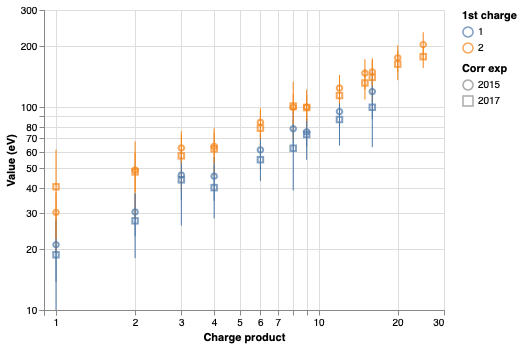

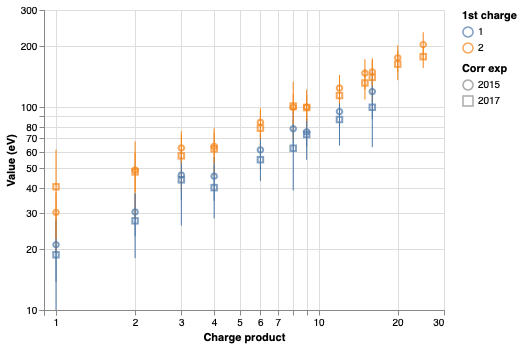

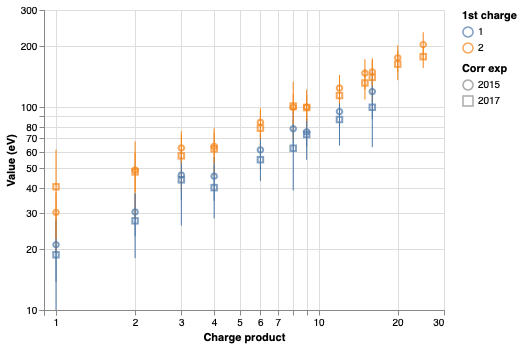

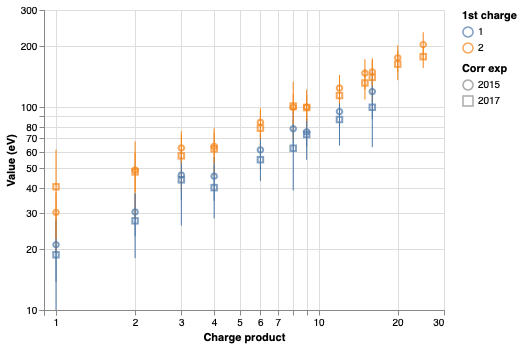

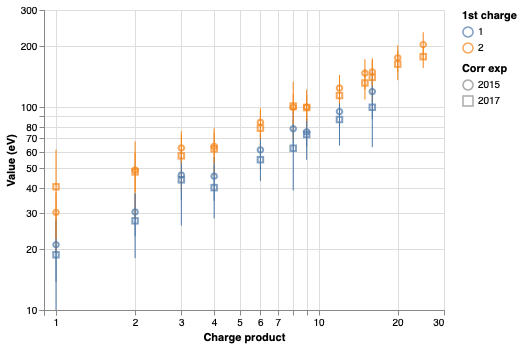

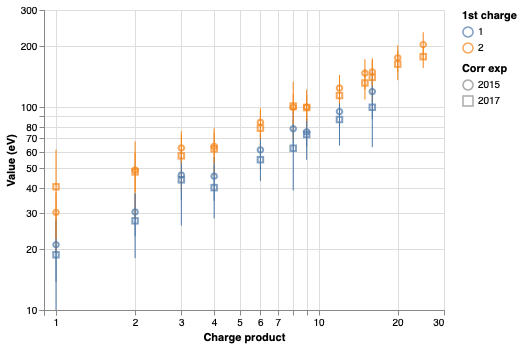

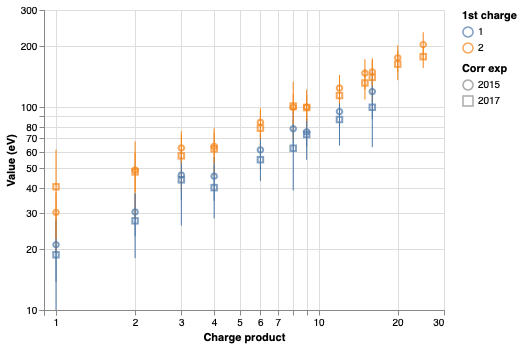

In [5]:
base = alt.Chart(data["Summ KERs"]).encode(
    x=alt.X("Charge product", scale=alt.Scale(type="log", domain=[0.9, 30], nice=False)),
    y=alt.Y("Value (eV)", scale=alt.Scale(type="log", domain=[10, 300], nice=False)),
    yError="Std (eV)",
    color="1st charge:N",
    shape="Corr exp:N",
)
base.mark_errorbar() + base.mark_point()

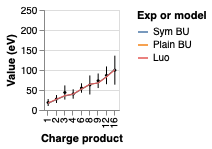

In [223]:
base = alt.Chart(width=75, height=100).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2017)
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x=alt.X("Charge product:N"),
    y=alt.Y(
        "Value (eV)",
        scale=alt.Scale(domain=[0, 250], nice=False),
        axis=alt.Axis(tickCount=6),
    ),
    yError="Std (eV)",
)
(
    (
        alt.layer(data=data["Summ KERs"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul KERs"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

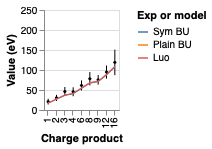

In [221]:
base = alt.Chart(width=75, height=100).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2015)
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x=alt.X("Charge product:N"),
    y=alt.Y(
        "Value (eV)",
        scale=alt.Scale(domain=[0, 250], nice=False),
        axis=alt.Axis(tickCount=6),
    ),
    yError="Std (eV)",
)
(
    (
        alt.layer(data=data["Summ KERs"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul KERs"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

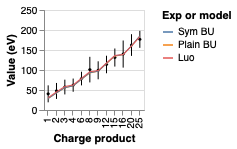

In [220]:
base = alt.Chart(width=100, height=100).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2017)
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x=alt.X("Charge product:N"),
    y=alt.Y(
        "Value (eV)",
        scale=alt.Scale(domain=[0, 250], nice=False),
        axis=alt.Axis(tickCount=6),
    ),
    yError="Std (eV)",
)
(
    (
        alt.layer(data=data["Summ KERs"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul KERs"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

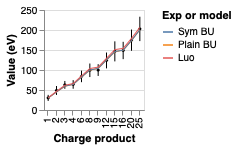

In [219]:
base = alt.Chart(width=100, height=100).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2015)
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x=alt.X("Charge product:N"),
    y=alt.Y(
        "Value (eV)",
        scale=alt.Scale(domain=[0, 250], nice=False),
        axis=alt.Axis(tickCount=6),
    ),
    yError="Std (eV)",
)
(
    (
        alt.layer(data=data["Summ KERs"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul KERs"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

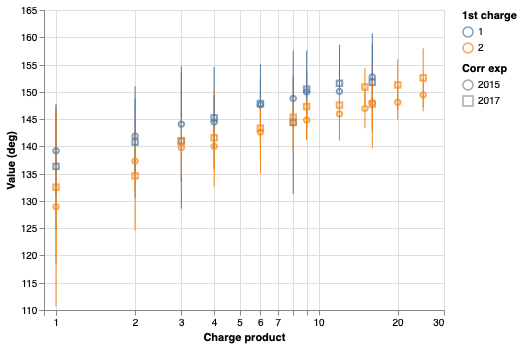

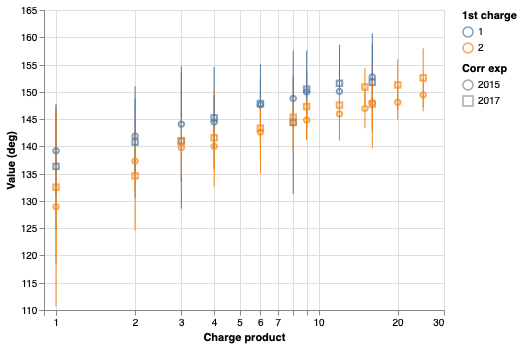

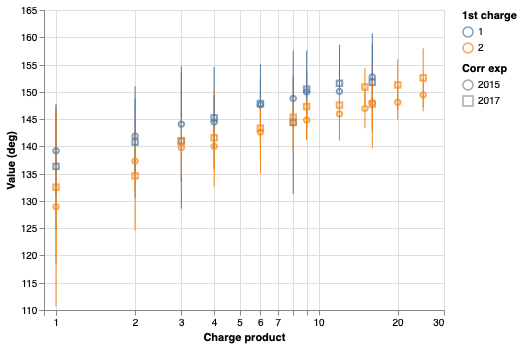

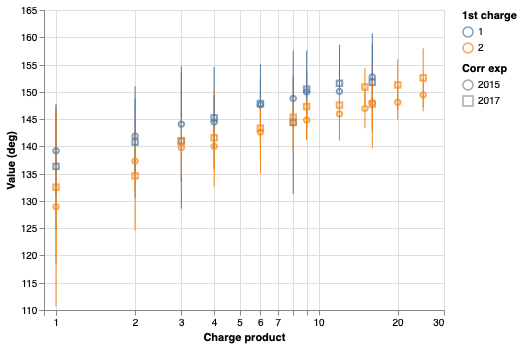

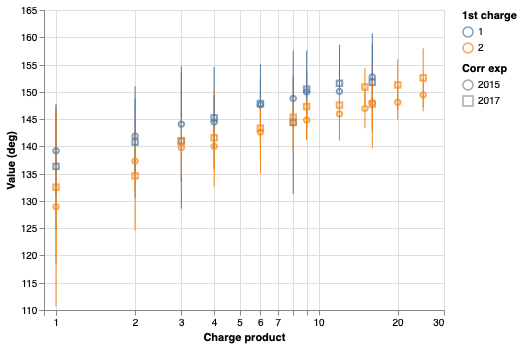

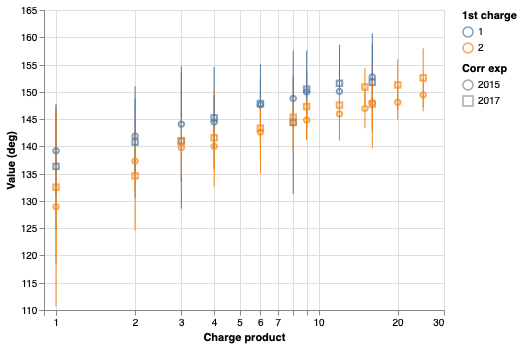

In [58]:
base = alt.Chart(data["Summ angles"]).encode(
    x=alt.X("Charge product", scale=alt.Scale(type="log", domain=[0.9, 30], nice=False)),
    y=alt.Y("Value (deg)", scale=alt.Scale(domain=[110, 165], nice=False)),
    yError="Std (deg)",
    color="1st charge:N",
    shape="Corr exp:N",
).transform_filter(datum["Which angle"] == "btw 2nd and 3rd")
base.mark_errorbar() + base.mark_point()

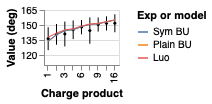

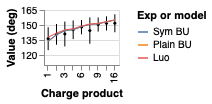

In [179]:
base = alt.Chart(width=75, height=55).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2017)
    & (datum["Which angle"] == "btw 2nd and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[110, 165], nice=False),
            axis=alt.Axis(tickCount=4, values=[120, 135, 150, 165])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

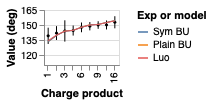

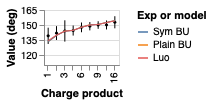

In [182]:
base = alt.Chart(width=75, height=55).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2015)
    & (datum["Which angle"] == "btw 2nd and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[110, 165], nice=False),
            axis=alt.Axis(tickCount=4, values=[120, 135, 150, 165])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

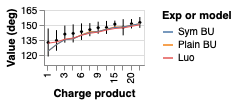

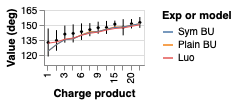

In [183]:
base = alt.Chart(width=100, height=55).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2017)
    & (datum["Which angle"] == "btw 2nd and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[110, 165], nice=False),
            axis=alt.Axis(tickCount=4, values=[120, 135, 150, 165])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

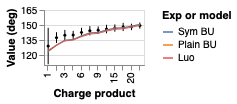

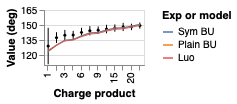

In [184]:
base = alt.Chart(width=100, height=55).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2015)
    & (datum["Which angle"] == "btw 2nd and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[110, 165], nice=False),
            axis=alt.Axis(tickCount=4, values=[120, 135, 150, 165])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

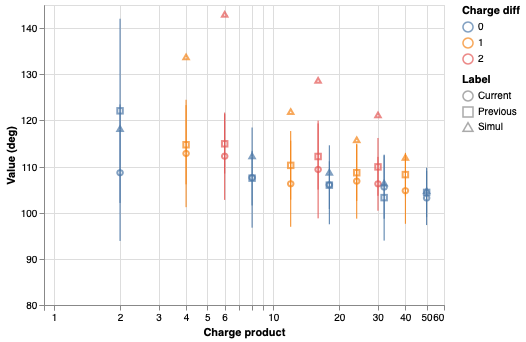

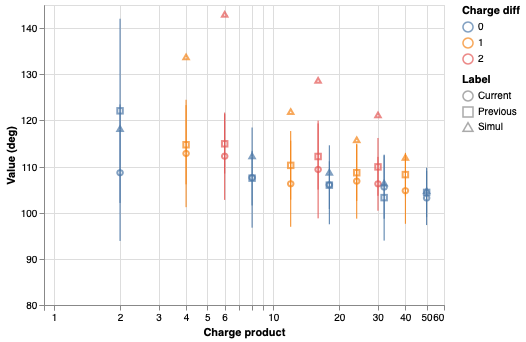

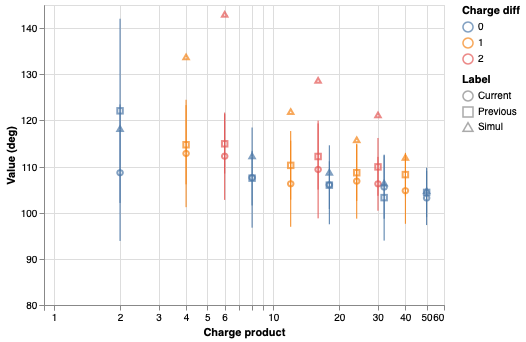

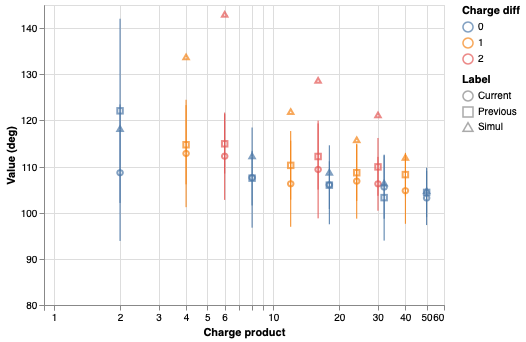

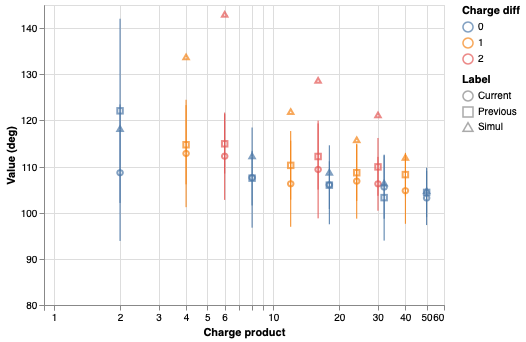

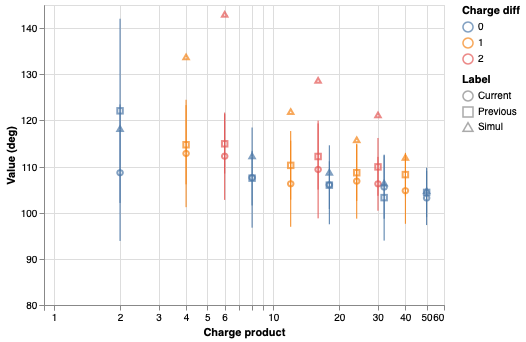

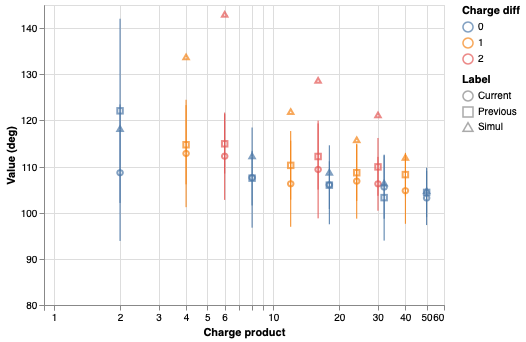

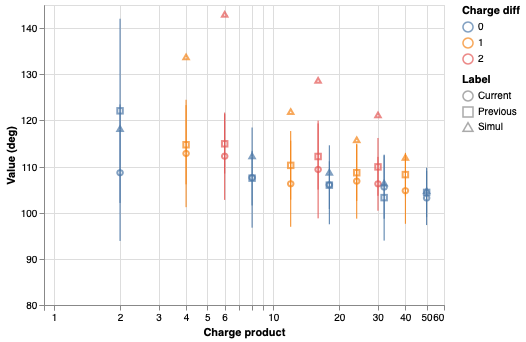

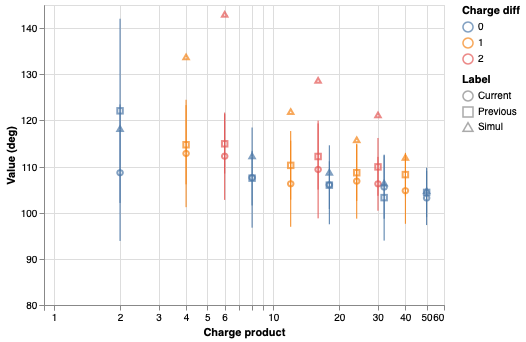

In [183]:
base = alt.Chart(data["Summ angles"]).transform_filter(
    datum["1st charge"] == 2
).encode(
    x=alt.X("Charge product", scale=alt.Scale(type="log", domain=[0.9, 60], nice=False)),
    y=alt.Y("Value (deg)", scale=alt.Scale(domain=[80, 145], nice=False)),
    yError="Std (deg)",
    color="Charge diff:N",
    shape="Label:N",
).transform_filter(datum["Which angle"] == "btw 1st and 2nd")
base.mark_errorbar(clip=True) + base.mark_point()

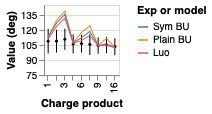

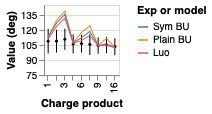

In [185]:
base = alt.Chart(width=75, height=70).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2017)
    & (datum["Which angle"] == "btw 1st and 2nd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

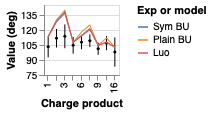

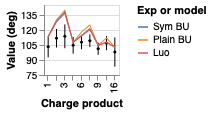

In [186]:
base = alt.Chart(width=75, height=70).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2015)
    & (datum["Which angle"] == "btw 1st and 2nd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

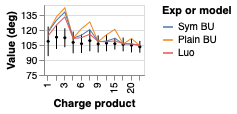

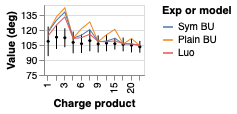

In [187]:
base = alt.Chart(width=100, height=70).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2017)
    & (datum["Which angle"] == "btw 1st and 2nd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

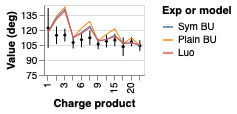

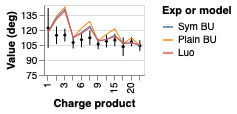

In [188]:
base = alt.Chart(width=100, height=70).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2015)
    & (datum["Which angle"] == "btw 1st and 2nd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

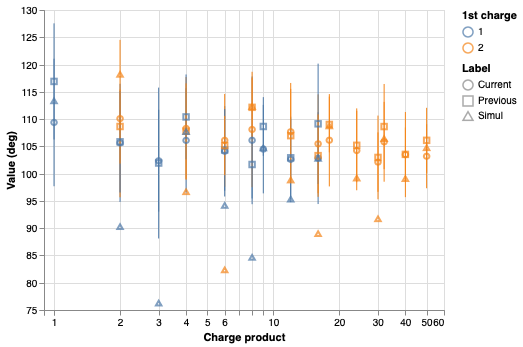

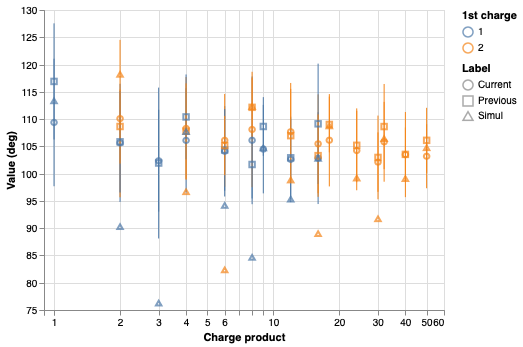

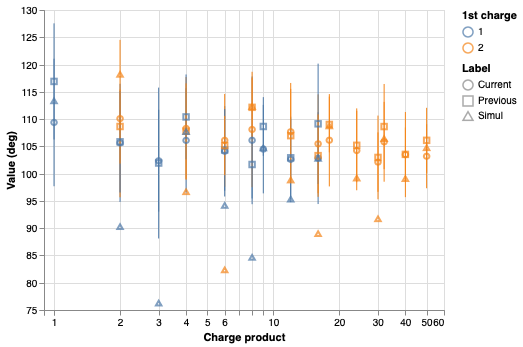

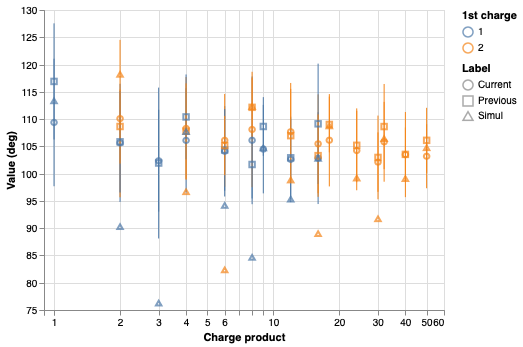

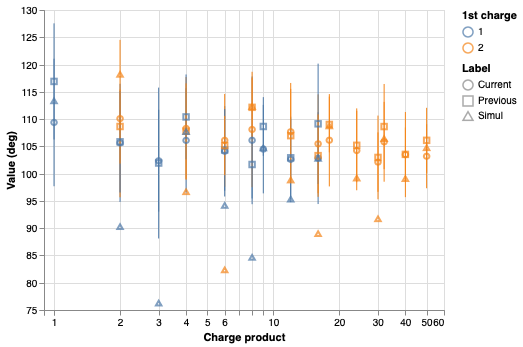

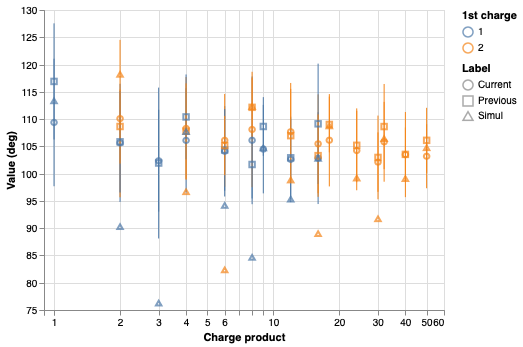

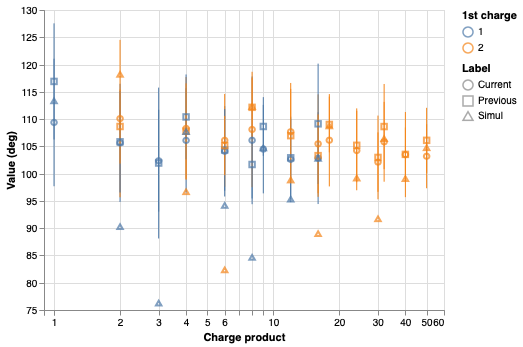

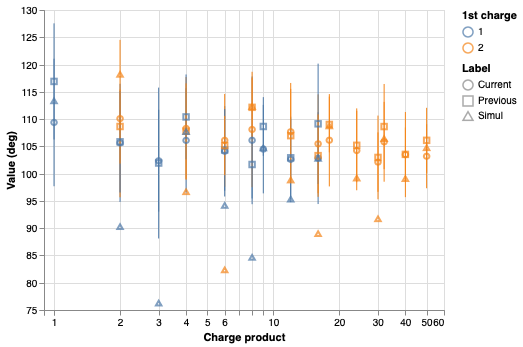

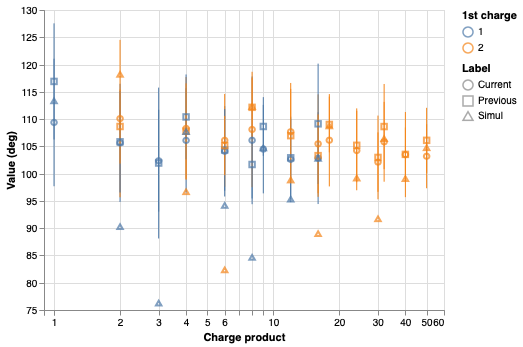

In [177]:
base = alt.Chart(data["Summ angles"]).encode(
    x=alt.X("Charge product", scale=alt.Scale(type="log", domain=[0.9, 60], nice=False)),
    y=alt.Y("Value (deg)", scale=alt.Scale(domain=[75, 130], nice=False)),
    yError="Std (deg)",
    color="1st charge:N",
    shape="Label:N",
).transform_filter(datum["Which angle"] == "btw 1st and 3rd")
base.mark_errorbar(clip=True) + base.mark_point()

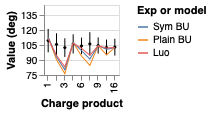

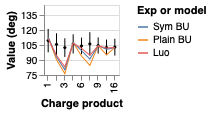

In [189]:
base = alt.Chart(width=75, height=70).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2017)
    & (datum["Which angle"] == "btw 1st and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

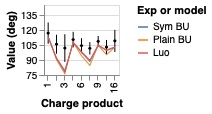

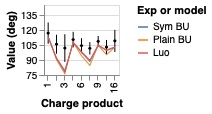

In [190]:
base = alt.Chart(width=75, height=70).transform_filter(
    (datum["1st charge"] == 1)
    & (datum["Corr exp"] == 2015)
    & (datum["Which angle"] == "btw 1st and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

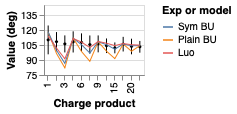

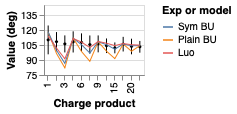

In [191]:
base = alt.Chart(width=100, height=70).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2017)
    & (datum["Which angle"] == "btw 1st and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)

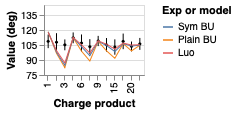

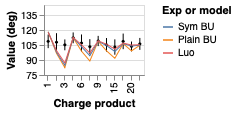

In [192]:
base = alt.Chart(width=100, height=70).transform_filter(
    (datum["1st charge"] == 2)
    & (datum["Corr exp"] == 2015)
    & (datum["Which angle"] == "btw 1st and 3rd")
    & (datum["Exp or model"] != "Daehyun")
).encode(
    x="Charge product:O",
    y=alt.Y("Value (deg)",
            scale=alt.Scale(domain=[75, 145], nice=False),
            axis=alt.Axis(tickCount=5, values=[75, 90, 105, 120, 135])),
    yError="Std (deg)",
)
(
    (
        alt.layer(data=data["Summ angles"])
        + base.mark_errorbar(color="black")
        + base.mark_point(color="black", filled=True, size=10, opacity=1)
    ) + (
        alt.layer(data=data["Simul angles"])
        + base.mark_line(strokeWidth=1).encode(
            color=alt.Color("Exp or model:N", sort=["Sym BU", "Plain BU", "Luo"])
        )
    )
)